In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [286]:
marzo = pd.read_csv('marzo.csv')
abril = pd.read_csv('abril.csv')
mayo = pd.read_csv('mayo.csv')
#df = pd.concat([marzo,abril,mayo], axis = 0)
df = marzo

In [287]:
df.head()

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada
0,61.980.620-4,937232-133-COT23,SE REQUIEREN REPONER CUBETAS,OC Emitida,CLP,1800000.0,Cubetas de impresión dental,42152105,Equipamiento y suministros médicos / Equipos y...,Cubetas de impresión dental,Equipamiento y suministros médicos / Equipos y...,DESPACHO 1 DÍA RECIBIDA OC.\nMONTO MÍNIMO EN F...,73960.0,77.371.920-9,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,True
1,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True
2,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,JV-MYD EL PROVEEDOR OFRECE LOS PRODUCTOS DETAL...,10680.0,76.271.360-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False
3,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE OFERTA LO SOLICITADO CON FOTOS CORRESPONDIE...,10000.0,76.687.656-0,"Comercial, dental.",False
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE COTIZA LO REQUERIDO - PRODUCTOS CON DISPONI...,18920.0,76.393.260-5,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False


In [288]:
df.describe()

,agilebuyingsavailableamount,agileitemsmp_id,agileoffereditemspreciototal
count,4.938690e+05,4.938690e+05,4.938690e+05
mean,9.875966e+05,4.650909e+07,2.369252e+05
std,6.197130e+05,4.081744e+06,3.398559e+05
min,1.000000e+00,4.212150e+07,0.000000e+00
25%,4.220000e+05,4.321160e+07,2.400000e+04
50%,9.000000e+05,4.412210e+07,8.970000e+04
75%,1.680000e+06,5.013170e+07,2.940000e+05
max,1.873500e+06,5.612200e+07,1.800000e+06


<AxesSubplot:title={'center':'Densidad de adjudicaciones en el dataset'}, ylabel='Density'>

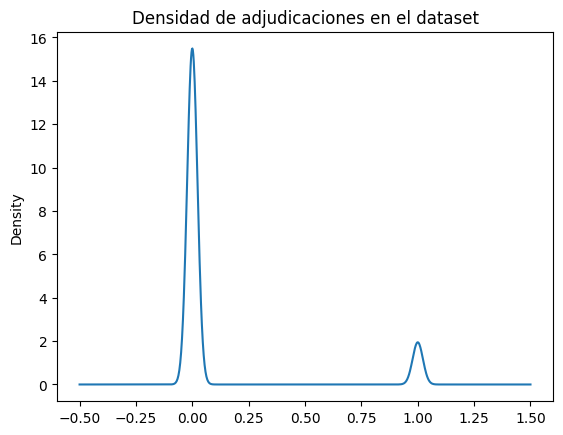

In [289]:
df['numeric'] = df['adjudicada'].apply(lambda x: 1 if x == True else 0)
df['numeric'].plot.density(title='Densidad de adjudicaciones en el dataset' )

numeric         total adj_rate
adjudicada          False  True                 
taxnumberprovider                               
10.000.558-1          0.0  13.0    13.0     1.00
10.011.441-0         20.0   1.0    21.0     0.05
10.018.801-5         17.0   1.0    18.0     0.06
10.024.618-k         22.0   0.0    22.0     0.00
10.025.673-8         80.0   0.0    80.0     0.00
...                   ...   ...     ...      ...
99.571.800-6         24.0  22.0    46.0     0.48
99.574.460-0        244.0  14.0   258.0     0.05
99.576.080-0         72.0  26.0    98.0     0.27
99.587.590-K         21.0   1.0    22.0     0.05
99.593.170-2       1132.0  88.0  1220.0     0.07

[2877 rows x 4 columns]

<AxesSubplot:title={'center':'Distribución de rate de adjudicación. n> 10 participaciones'}, ylabel='Density'>

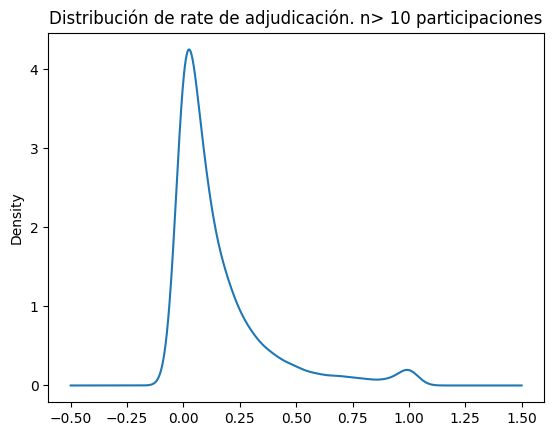

In [290]:
gb = df[['taxnumberprovider','adjudicada', 'numeric']].groupby(by=['taxnumberprovider','adjudicada']).count()
gb = gb.unstack().fillna(0)


gb['total'] = gb[('numeric', False)] +  gb[('numeric', True)]
gb['adj_rate'] =( gb[('numeric', True)]/gb['total']).round(2)
gb = gb[gb['total'] >= 10]
display(gb)

gb['adj_rate'].plot.density(title= 'Distribución de rate de adjudicación. n> 10 participaciones')

Text(0.5, 1.0, 'Distribución probabilidad de adjudicaciones por usuario, todos los rubros.')

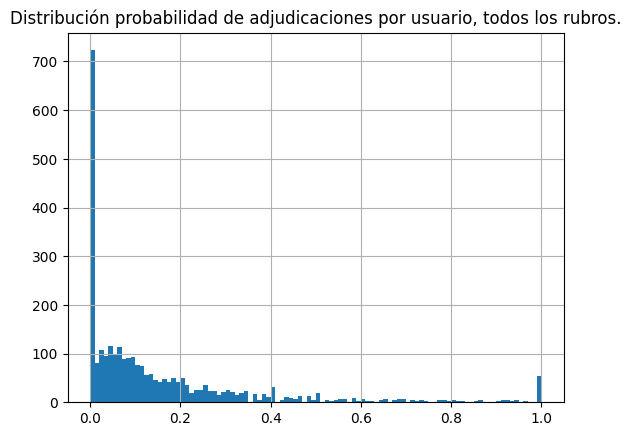

In [291]:
ax = gb['adj_rate'].hist(bins = 100)
plt.title('Distribución probabilidad de adjudicaciones por usuario, todos los rubros.')

In [292]:
gb = gb.reset_index()
gb

taxnumberprovider numeric         total adj_rate
adjudicada                     False  True                 
0               10.000.558-1     0.0  13.0    13.0     1.00
1               10.011.441-0    20.0   1.0    21.0     0.05
2               10.018.801-5    17.0   1.0    18.0     0.06
3               10.024.618-k    22.0   0.0    22.0     0.00
4               10.025.673-8    80.0   0.0    80.0     0.00
...                      ...     ...   ...     ...      ...
2872            99.571.800-6    24.0  22.0    46.0     0.48
2873            99.574.460-0   244.0  14.0   258.0     0.05
2874            99.576.080-0    72.0  26.0    98.0     0.27
2875            99.587.590-K    21.0   1.0    22.0     0.05
2876            99.593.170-2  1132.0  88.0  1220.0     0.07

[2877 rows x 5 columns]

In [293]:
gb_merge= gb[['taxnumberprovider','total','adj_rate']]

In [294]:
merge = pd.merge(df,gb_merge, on = 'taxnumberprovider', how = 'left')
#print(merge.columns)
merge = merge.rename(columns={('total', ''):'total',
                             ('adj_rate', ''):'adj_rate'})
display(merge.head())

/tmp/ipykernel_94903/4118440528.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merge = pd.merge(df,gb_merge, on = 'taxnumberprovider', how = 'left')
/tmp/ipykernel_94903/4118440528.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merge = pd.merge(df,gb_merge, on = 'taxnumberprovider', how = 'left')


,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,numeric,total,adj_rate
0,61.980.620-4,937232-133-COT23,SE REQUIEREN REPONER CUBETAS,OC Emitida,CLP,1800000.0,Cubetas de impresión dental,42152105,Equipamiento y suministros médicos / Equipos y...,Cubetas de impresión dental,Equipamiento y suministros médicos / Equipos y...,DESPACHO 1 DÍA RECIBIDA OC.\nMONTO MÍNIMO EN F...,73960.0,77.371.920-9,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,True,1,341.0,0.25
1,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True,1,1459.0,0.08
2,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,JV-MYD EL PROVEEDOR OFRECE LOS PRODUCTOS DETAL...,10680.0,76.271.360-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,1080.0,0.41
3,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE OFERTA LO SOLICITADO CON FOTOS CORRESPONDIE...,10000.0,76.687.656-0,"Comercial, dental.",False,0,2323.0,0.11
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE COTIZA LO REQUERIDO - PRODUCTOS CON DISPONI...,18920.0,76.393.260-5,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,576.0,0.04


In [295]:

import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel
import pymc as pm
import arviz as az

In [296]:
merge.head()

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,numeric,total,adj_rate
0,61.980.620-4,937232-133-COT23,SE REQUIEREN REPONER CUBETAS,OC Emitida,CLP,1800000.0,Cubetas de impresión dental,42152105,Equipamiento y suministros médicos / Equipos y...,Cubetas de impresión dental,Equipamiento y suministros médicos / Equipos y...,DESPACHO 1 DÍA RECIBIDA OC.\nMONTO MÍNIMO EN F...,73960.0,77.371.920-9,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,True,1,341.0,0.25
1,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True,1,1459.0,0.08
2,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,JV-MYD EL PROVEEDOR OFRECE LOS PRODUCTOS DETAL...,10680.0,76.271.360-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,1080.0,0.41
3,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE OFERTA LO SOLICITADO CON FOTOS CORRESPONDIE...,10000.0,76.687.656-0,"Comercial, dental.",False,0,2323.0,0.11
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE COTIZA LO REQUERIDO - PRODUCTOS CON DISPONI...,18920.0,76.393.260-5,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,576.0,0.04


In [297]:
merge.sample(n = 1)

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,numeric,total,adj_rate
464439,69.073.200-9,2933-109-COT23,Según correo electrónico dideco@comunaalhue.cl...,OC Emitida,$,1700000.0,Pañales para adultos,53102306,"Ropa, maletas y productos de aseo personal / R...",Pañales para adultos,Ropa interior,20 paquetes de pañales adultos Talla G (marca ...,332000.0,77.249.374-6,REPARACION DE OTRO TIPO DE MAQUINARIA Y EQUIPO...,False,0,NaN,NaN


In [298]:
#merge = merge.query('taxnumberprovider == "76.271.360-8"')

In [299]:
columns_train = ['agileoffereditemspreciototal','total','agilebuyingsavailableamount']

endog = merge['adj_rate'].fillna(0)
exog = merge[columns_train].fillna(0)
exog = sm.add_constant(exog)
#exog.shape

endog = np.clip(endog, 0.01, 0.99)

mod = BetaModel(endog, exog)
rslt = mod.fit()

print(rslt.summary())


                              BetaModel Results                               
Dep. Variable:               adj_rate   Log-Likelihood:             5.7440e+05
Model:                      BetaModel   AIC:                        -1.149e+06
Method:            Maximum Likelihood   BIC:                        -1.149e+06
Date:                Fri, 17 Nov 2023                                         
Time:                        22:44:47                                         
No. Observations:              493869                                         
Df Residuals:                  493864                                         
Df Model:                           3                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.0923      0.003   -765.102      0.000      -2.098      -2.08

/home/magda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [300]:
observed_data = test['adj_rate']
observed_data = np.clip(observed_data,0.01,0.99)


In [301]:
with pm.Model() as model_g:
    # Variables exógenas
    mean, sigma = 0.5, 0.5
    mu = pm.TruncatedNormal('$\mu$', mu=mean, sigma=sigma, lower=0, upper=1) # N(0.5, 0.5) * T(0, 1)

    shape, scale = 3, 0.1
    psi = pm.Gamma('$\psi$', mu=shape, sigma=scale)
    alpha, beta = mu * psi, (1 - mu) * psi
    # Variable endógena
    y = pm.Beta('y', alpha=alpha, beta=beta, observed=observed_data)

    trace_g = pm.sample(1000)
#model.debug()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\mu$, $\psi$]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


In [302]:
# Assuming you've already run the model and obtained the trace_g

# Sample from the posterior predictive distribution
ppc = pm.sample_posterior_predictive(trace_g, model=model_g)
print(ppc.keys())
# Access the simulated observations
simulated_data = ppc['posterior_predictive']
mean_simulated = simulated_data.mean(dim='chain', skipna=True)

# Compute summary statistics or use the simulated data as needed
#mean_simulated = simulated_data.mean(axis=0)
print(mean_simulated)

Sampling: [y]


KeysView(Inference data with groups:
	> posterior_predictive
	> observed_data)
<xarray.Dataset>
Dimensions:  (draw: 1000, y_dim_2: 2323)
Coordinates:
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 ... 2317 2318 2319 2320 2321 2322
Data variables:
    y        (draw, y_dim_2) float64 0.08972 0.1812 0.09489 ... 0.1815 0.1487


In [303]:
import matplotlib.pyplot as plt

# Assuming you've already computed mean_simulated
mean_values = mean_simulated.values  # Extract NumPy array from xarray
print(mean_values)


<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (draw: 1000, y_dim_2: 2323)
Coordinates:
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * y_dim_2  (y_dim_2) int64 0 1 2 3 4 5 6 ... 2317 2318 2319 2320 2321 2322
Data variables:
    y        (draw, y_dim_2) float64 0.08972 0.1812 0.09489 ... 0.1815 0.1487>


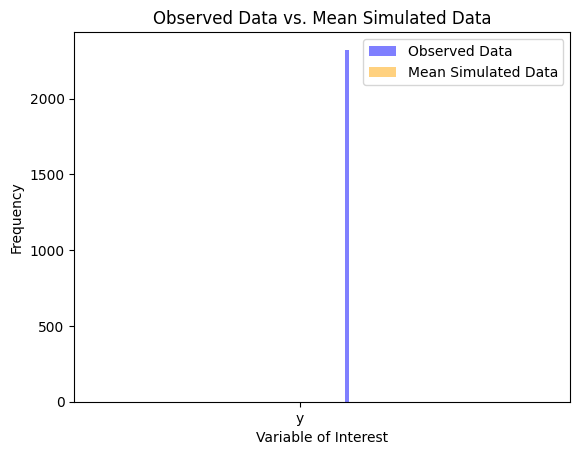

In [304]:
import matplotlib.pyplot as plt

# Visualize the observed data
plt.hist(observed_data, bins=100, alpha=0.5, label='Observed Data', color='blue')

# Overlay the histogram of the mean_simulated
plt.hist(mean_simulated, bins=100, alpha=0.5, label='Mean Simulated Data', color='orange')

plt.legend()
plt.xlabel('Variable of Interest')
plt.ylabel('Frequency')
plt.title('Observed Data vs. Mean Simulated Data')
plt.show()


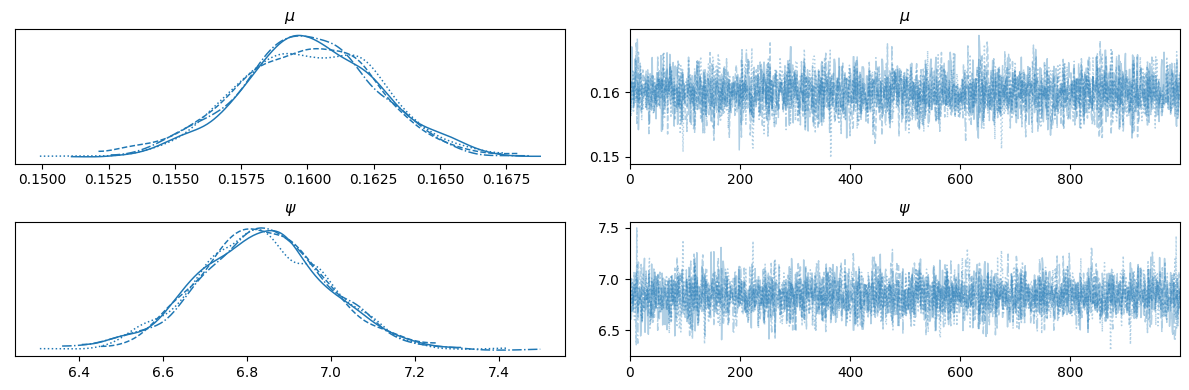

In [305]:
az.plot_trace(trace_g)
 
plt.tight_layout()
plt.show()

array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='$\\mu$', ylabel='$\\psi$'>, <AxesSubplot:>]],
      dtype=object)

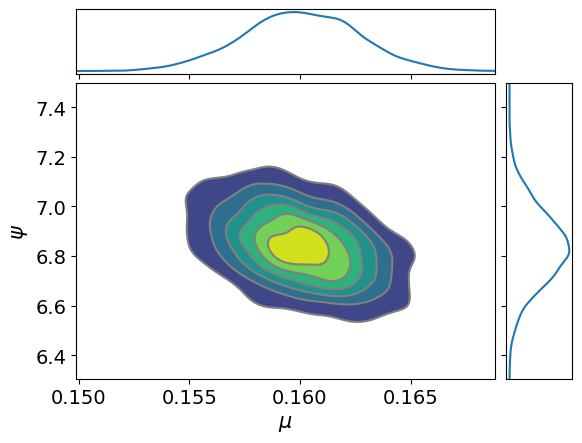

In [306]:
az.plot_pair(trace_g, kind='kde', marginals=True)

array([<AxesSubplot:title={'center':'$\\mu$'}>,
       <AxesSubplot:title={'center':'$\\psi$'}>], dtype=object)

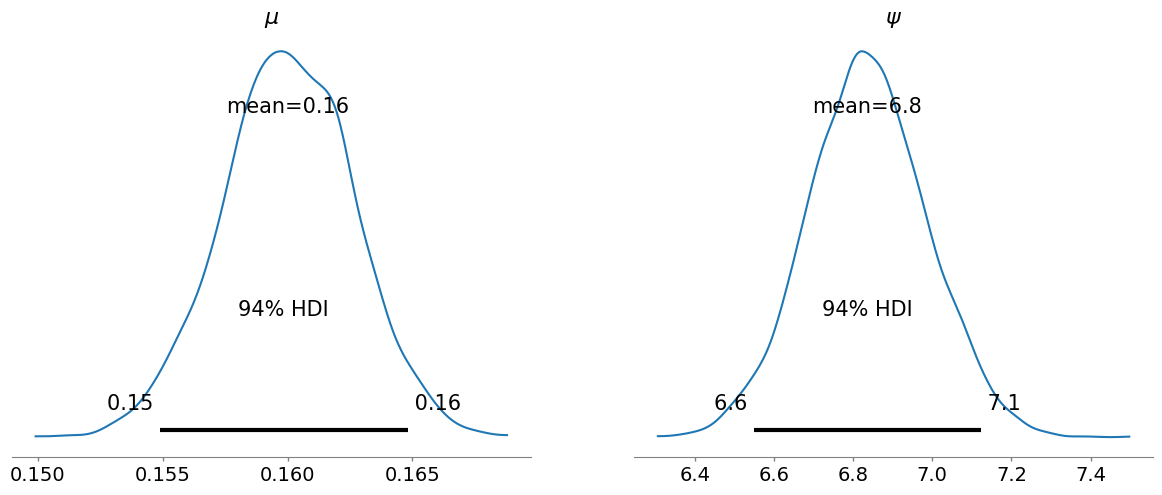

In [307]:
az.plot_posterior(trace_g)

In [308]:
# Primero, obtendremos mu tutorial y mu tarea:
# mu tutorial es h^-1(X*beta), es decir, expit(X*beta)
#columns_train = ['LTV', 'purpose1_1', 'lnrr', 'event_1']
#endog = test.loc[:,'adj_rate']
#exog = test.loc[:,columns_train]

exog = sm.add_constant(exog)
regresion_values = np.array(rslt.params[:-1]) # precision no nos interesa
mu_tutorial = expit(np.dot(exog, regresion_values).astype(float))

# Pero necesitamos un número, así que tomaremos el promedio :-)
mu_tutorial = np.mean(mu_tutorial)
# Ahora necesitamos mu_tarea, que es la media de la distribucion beta
mu_tarea = 0.25 # la media de la posterior

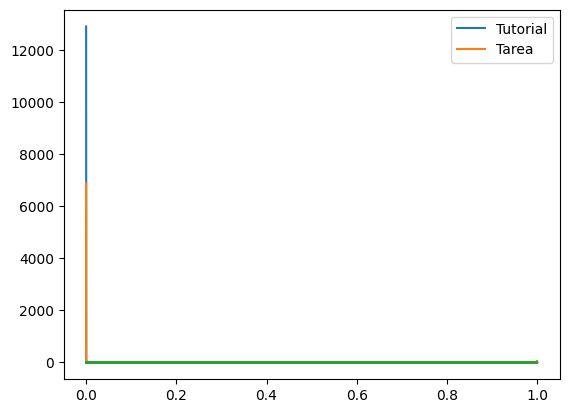

In [309]:
psi = 0.73

alfa_tarea, beta_tarea = mu_tarea * psi, (1 - mu_tarea) * psi
alfa_tutorial, beta_tutorial = mu_tutorial * psi, (1 - mu_tutorial) * psi

# Ahora, graficaremos las distribuciones
x = np.linspace(0, 1, len(merge['adj_rate']))
y_tutorial = stats.beta.pdf(x, alfa_tutorial, beta_tutorial)
y_tarea = stats.beta.pdf(x, alfa_tarea, beta_tarea)

plt.plot(x, y_tutorial, label='Tutorial')
plt.plot(x, y_tarea, label='Tarea')
plt.plot(x, merge['adj_rate'])
plt.legend()
plt.show()

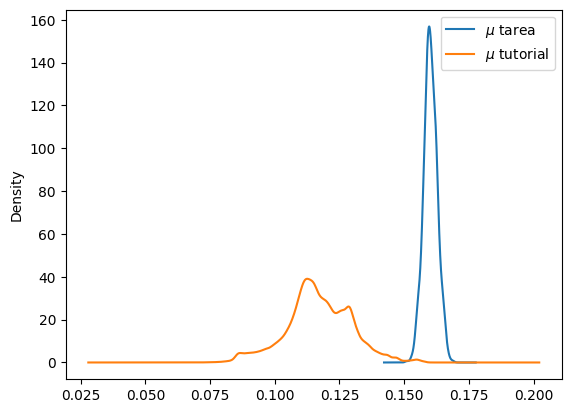

array_mu_tarea['mu'].mean():  0.16017255831069765
array_mu_tutorial['mu'].mean():  0.11695813364592758


In [310]:
array_mu_tarea = pd.DataFrame(np.array(trace_g.posterior["$\mu$"])[0], columns=["mu"])
array_mu_tutorial = pd.DataFrame(expit(np.dot(exog, regresion_values).astype(float)), columns=["mu"])

#getattr(self.genres[i], feature).plot.density()
# Plotear densidad del primer dataframe
array_mu_tarea['mu'].plot(kind='density', label='$\mu$ tarea')


# Plotear densidad del segundo dataframe
array_mu_tutorial['mu'].plot(kind='density', label='$\mu$ tutorial')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico resultante
plt.show()
print("array_mu_tarea['mu'].mean(): ", array_mu_tarea['mu'].mean())
print("array_mu_tutorial['mu'].mean(): ", array_mu_tutorial['mu'].mean())

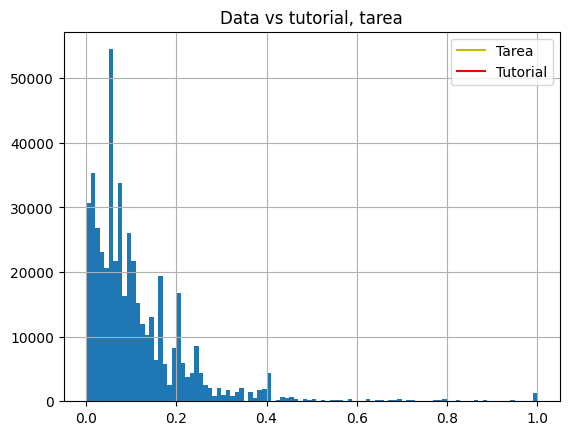

In [311]:
merge.adj_rate.hist(bins= 100)

alfa_tarea, beta_tarea = mu_tarea * psi, (1 - mu_tarea) * psi
alfa_tutorial, beta_tutorial = mu_tutorial * psi, (1 - mu_tutorial) * psi

x = np.sort(test['adj_rate'])

y_tutorial = stats.beta.pdf(x, alfa_tutorial, beta_tutorial)*30
y_tarea = stats.beta.pdf(x, alfa_tarea, beta_tarea)*30

plt.plot(x, y_tarea, label='Tarea', color = 'y')
plt.plot(x, y_tutorial, label='Tutorial', color = 'r')

plt.title('Data vs tutorial, tarea')
plt.legend()
plt.show()